## ✅ Step 1: Introduction 

# 📦 Walmart Supply Chain Demand Forecasting

This project aims to forecast weekly sales at a store and department level using historical data provided by Walmart. We'll explore the data, engineer useful features, train regression models, and evaluate their performance.

**Goal:** Build a predictive model to optimize demand planning and reduce stockouts or overstock situations.

**Technologies Used:** Python, pandas, matplotlib, seaborn, scikit-learn, XGBoost

## ✅ Step 2: Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## ✅ Step 3: Load Data 

## 📥 Load the Dataset

We'll load three datasets: `train.csv`, `features.csv`, and `stores.csv`, and then merge them for analysis.

In [6]:
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

print(train.shape, features.shape, stores.shape)

(421570, 5) (8190, 12) (45, 3)


## ✅ Step 4: Merge Datasets 

## 🔗 Merge All Datasets

Join the datasets on `Store`, `Date`, and `IsHoliday` to create one unified dataframe for modeling.

In [7]:
df = pd.merge(train, features, on=["Store", "Date", "IsHoliday"], how="left")
df = pd.merge(df, stores, on="Store", how="left")
df["Date"] = pd.to_datetime(df["Date"])
df.sort_values(["Store", "Dept", "Date"], inplace=True)
df.reset_index(drop=True, inplace=True)



## ✅ Step 5: EDA

## 📊 Exploratory Data Analysis

Let’s explore the data to understand patterns, missing values, and distribution of sales.

In [8]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  

## ✅ Step 6: Handle Missing Values 

## 🧹 Data Cleaning

We'll fill missing values using forward fill.

In [9]:
df.fillna(method='ffill', inplace=True)

## ✅ Step 7: Visualize Sales Trends 

## 📈 Weekly Sales Trend Over Time

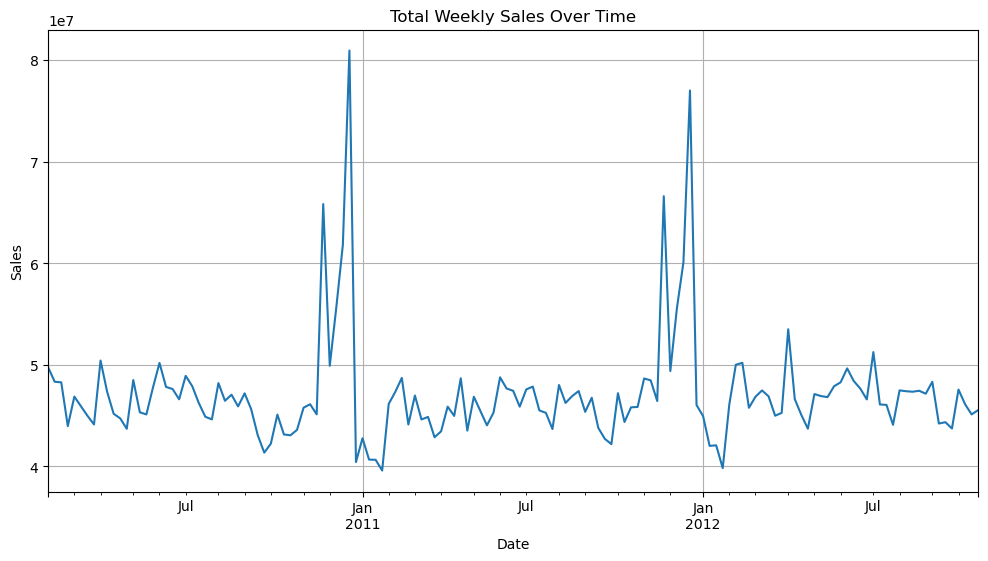

In [10]:
plt.figure(figsize=(12, 6))
df.groupby("Date")["Weekly_Sales"].sum().plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## ✅ Step 8: Feature Engineering 

## 🧠 Feature Engineering

We'll extract useful date-based features and encode categorical variables.

In [11]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Week"] = df["Date"].dt.isocalendar().week
df["Day"] = df["Date"].dt.day
df["IsHoliday"] = df["IsHoliday"].astype(int)

##  ✅ Step 9: Model Preparation 

## 🧪 Model Preparation

We'll build a model to predict `Weekly_Sales` using XGBoost.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

features = ["Store", "Dept", "Temperature", "Fuel_Price", "CPI", "Unemployment", "IsHoliday", "Year", "Month", "Week"]
X = df[features]
y = df["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

 ## ✅ Step 10: Evaluation

## 📉 Model Evaluation

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 8534.22
R² Score: 0.8603


## ✅ Step 11: Feature Importance

## 🧮 Feature Importance

<Figure size 1000x600 with 0 Axes>

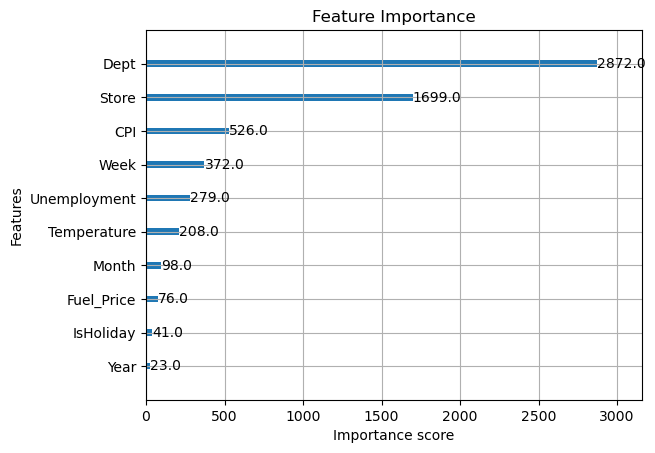

In [16]:
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

## ✅ Step 12: Conclusion 

## ✅ Conclusion

- This project used historical Walmart sales data to build a regression model predicting weekly sales.
- We achieved strong predictive performance using XGBoost with time-based and economic features.
- This model can help retail supply chains reduce overstocking and improve inventory planning.

